In [2]:
import pandas as pd

In [3]:
training=pd.read_csv("Data/train.csv")
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(training.index)

891

In [5]:
training.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# %of people survived
training.Survived.value_counts()[1]*100/len(training.index)

38.38383838383838

In [7]:
# Lets quickly analyse all the columns. We will work with other non-numeric columns later
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DEC207A90>]],
      dtype=object)

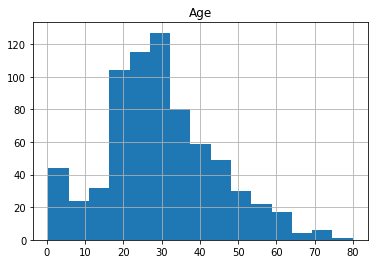

In [10]:
# lets build a histogram to look at this data better
training.hist(column=['Age'],bins=15)

In [11]:
# For now. Lets just use mean age by gender to get those missing values. 
# We will try to use better estimation techniques when we are improving our model
print(training[training.Age.isna()].head())
training['Age']=training.Age.fillna(training.groupby("Sex")["Age"].transform("mean"))
print(training[training.Age.isna()].head())

    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631   7.2250   NaN        C  
28      0      0  330959   7.8792   NaN        Q  
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [19]:
#Bucketing of data will give some more sense to it. Lets create a few buckets. As starter. Lets do 
#0-16,16-24,24-30,30-40,40-50,50+ My goal here is not to create symmetrical buckets, but to add some sense to data. 
#There is handy way to do this in pandas. Using cut method
bins = [0, 16, 24, 30, 40, 50, 100]
labels = ["0-16","16-24","24-30","30-40","40-50","50+"]
training['Age_Binned'] = pd.cut(training['Age'], bins=bins, labels=labels)

In [20]:
training.Age_Binned.value_counts()

30-40    279
24-30    185
16-24    177
0-16     100
40-50     86
50+       64
Name: Age_Binned, dtype: int64

In [12]:
# Now lets look at the other variables Sibsp and Parch.
print(training.SibSp.value_counts())
print(training.Parch.value_counts())


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
#We do not need so many categories here as well. 
#Lets just create few bins for this as well 0,1,2,3+ should be enough in this case
#Since 0,1,2 needs no binning. Lets just convert the rest into 3+
training['SibSp_Binned'] = np.where(training.SibSp > 2, '3+',training.SibSp)
training['Parch_Binned'] = np.where(training.Parch > 2, '3+',training.Parch)

In [16]:
print(training.SibSp_Binned.value_counts())
print(training.Parch_Binned.value_counts())

0     608
1     209
3+     46
2      28
Name: SibSp_Binned, dtype: int64
0     678
1     118
2      80
3+     15
Name: Parch_Binned, dtype: int64


In [23]:
training[['Survived','Pclass','Sex','Ticket','Fare','SibSp_Binned','Parch_Binned', 'Age_Binned']]
    .describe(include='all')

,Survived,Pclass,Sex,Ticket,Fare,SibSp_Binned,Parch_Binned,Age_Binned
count,891.000000,891.000000,891,891,891.000000,891,891,891
unique,NaN,NaN,2,681,NaN,4,4,6
top,NaN,NaN,male,347082,NaN,0,0,30-40
freq,NaN,NaN,577,7,NaN,608,678,279
mean,0.383838,2.308642,NaN,NaN,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,NaN,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,31.000000,NaN,NaN,NaN


In [21]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SibSp_Binned',
       'Parch_Binned', 'Age_Binned'],
      dtype='object')